# Import Neccesary Library

In [1]:
from vnstock import *
import mplfinance as mpf
import statsmodels.api as sm
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

## Listing out all Companies

In [4]:
company_lst = listing_companies()
company_lst

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,...,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,...,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,SDK,UPCOM,Công ty Cổ phần Cơ khí Luyện Kim,Cơ khí Luyện Kim,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1603,SRF,HOSE,Công ty Cổ phần Searefico,SEAREFICO,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1604,UEM,UPCOM,Công ty Cổ phần Cơ điện Uông Bí - Vinacomin,Cơ điện Uông Bí - Vinacomin,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1605,VEA,UPCOM,Tổng Công ty Máy động lực và Máy nông nghiệp V...,Máy động lực và Máy NN,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False


In [5]:
company_lst.describe(include='all')

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,...,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
count,1607,1607,1607,1607,1607,1607,1607,1607,1607,1607,...,1607,1607,1607,1607,1607,1607,1607,1607,1607,1607
unique,1607,3,1606,1606,2,5,88,88,11,19,...,2,2,2,2,2,2,2,2,2,2
top,SSI,UPCOM,Công ty Cổ phần Nam Việt,Xây dựng Số 5,DN,CT,Xây dựng,Công nghiệp/Xây dựng và Vật liệu/Xây dựng và V...,Công nghiệp,Xây dựng và Vật liệu,...,False,False,False,False,False,False,False,False,False,False
freq,1,865,2,2,1576,1512,221,221,586,326,...,1589,1586,1599,1571,1599,1526,1603,1562,1569,1595
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
company_overview('VCB')

,ticker,exchange,industry,companyType,noShareholders,foreignPercent,outstandingShare,issueShare,establishedYear,noEmployees,stockRating,deltaInWeek,deltaInMonth,deltaInYear,shortName,industryEn,industryID,industryIDv2,website
0,VCB,HOSE,Ngân hàng,NH,25183,0.233,5589.1,5589.1,2008,23493,2.7,-0.002,-0.039,-0.1,Vietcombank,Banks,289,8355,https://vietcombank.com.vn


## VCB Stock Historical Data

### 1. Descriptive Analysis

In [3]:
df =  stock_historical_data(symbol='VCB', start_date="2003-01-01", end_date="2024-06-20")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    3059 non-null   object
 1   open    3059 non-null   int64 
 2   high    3059 non-null   int64 
 3   low     3059 non-null   int64 
 4   close   3059 non-null   int64 
 5   volume  3059 non-null   int64 
 6   ticker  3059 non-null   object
dtypes: int64(5), object(2)
memory usage: 167.4+ KB


,time,open,high,low,close,volume,ticker
0,2012-03-20,10100,10560,10100,10560,1819480,VCB
1,2012-03-21,10560,10850,10560,10600,1083450,VCB
2,2012-03-22,10600,10850,10560,10670,1412870,VCB
3,2012-03-23,10670,10770,10530,10530,1025350,VCB
4,2012-03-26,10530,10600,10420,10490,755570,VCB


In [4]:
df.to_excel("VCBStockHistory_0123_0624.xlsx",index=False)

In [6]:
print(df.isnull().sum())

time      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64


In [7]:
df.describe(include='all')

,time,open,high,low,close,volume,ticker
count,3059,3059.000000,3059.000000,3059.000000,3059.000000,3.059000e+03,3059
unique,3058,NaN,NaN,NaN,NaN,NaN,1
top,2022-12-27,NaN,NaN,NaN,NaN,NaN,VCB
freq,2,NaN,NaN,NaN,NaN,NaN,3059
mean,NaN,40162.407650,40636.169336,39709.055247,40184.316770,1.083525e+06,NaN
std,NaN,25951.947715,26204.022473,25677.247261,25954.181759,8.073036e+05,NaN
min,NaN,7470.000000,7680.000000,7470.000000,7470.000000,2.806000e+04,NaN
25%,NaN,16550.000000,16775.000000,16309.500000,16550.000000,5.332550e+05,NaN
50%,NaN,35980.000000,36540.000000,35520.000000,35980.000000,8.926000e+05,NaN
75%,NaN,63590.000000,64219.500000,62660.000000,63510.000000,1.403230e+06,NaN


- **Total Rows (count):** 3059 entries for each column.
- **Ticker Symbol (ticker):** The dataset includes data for a single stock symbol "VCB".

1. **Time:**
   - **Count:** 3059 (total entries).
   - **Unique:** 3058, indicating almost all entries are unique, except for one date that appears twice.
   - **Top:** The most frequent date is "2022-12-27" (appears twice).
   - **Frequency:** This date appears 2 times.

2. **Open:**
   - **Count:** 3059.
   - **Mean:** 40162.41.
   - **Standard Deviation (std):** 25951.95, showing considerable variation in opening prices.
   - **Minimum (min):** 7470.
   - **25th Percentile (25%):** 16550, meaning 25% of the opening prices are below 16550.
   - **50th Percentile (Median, 50%):** 35980.
   - **75th Percentile (75%):** 63590, indicating 75% of the opening prices are below 63590.
   - **Maximum (max):** 98500.

3. **High:**
   - **Count:** 3059.
   - **Mean:** 40636.17.
   - **Standard Deviation (std):** 26204.02, suggesting significant fluctuation in high prices.
   - **Minimum (min):** 7680.
   - **25th Percentile (25%):** 16775.
   - **50th Percentile (Median, 50%):** 36540.
   - **75th Percentile (75%):** 64219.50.
   - **Maximum (max):** 100500.

4. **Low:**
   - **Count:** 3059.
   - **Mean:** 39709.06.
   - **Standard Deviation (std):** 25677.25, reflecting notable variability in low prices.
   - **Minimum (min):** 7470.
   - **25th Percentile (25%):** 16309.50.
   - **50th Percentile (Median, 50%):** 35520.
   - **75th Percentile (75%):** 62660.
   - **Maximum (max):** 97300.

5. **Close:**
   - **Count:** 3059.
   - **Mean:** 40184.32.
   - **Standard Deviation (std):** 25954.18, indicating high variation in closing prices.
   - **Minimum (min):** 7470.
   - **25th Percentile (25%):** 16550.
   - **50th Percentile (Median, 50%):** 35980.
   - **75th Percentile (75%):** 63510.
   - **Maximum (max):** 97400.

6. **Volume:**
   - **Count:** 3059.
   - **Mean:** 1,083,525.
   - **Standard Deviation (std):** 807,303.6, showing wide fluctuation in trading volume.
   - **Minimum (min):** 28,060.
   - **25th Percentile (25%):** 533,255.
   - **50th Percentile (Median, 50%):** 892,600.
   - **75th Percentile (75%):** 1,403,230.
   - **Maximum (max):** 7,265,480.

#### Summary:
- The dataset consists of 3059 trading days for the stock ticker "VCB".
- There's a broad range of prices and volumes, indicating significant volatility in the stock's trading behavior.
- Key statistics (mean, median, percentiles) provide insights into the typical values and the spread of the data.
- The maximum volume indicates a particularly high trading day compared to the median and mean, suggesting occasional large spikes in trading activity.

In [8]:
#Filter VCB stock historical data from 01/2024 - 06/2024
#Convert time column
df_analyse = df.copy()
df_analyse['time'] = pd.to_datetime(df_analyse['time'])

#Set time column as index
df_analyse.set_index('time', inplace=True)

#Filter to Plotting chart
filtered_df = df_analyse.loc['2024-01-01':'2024-06-20']

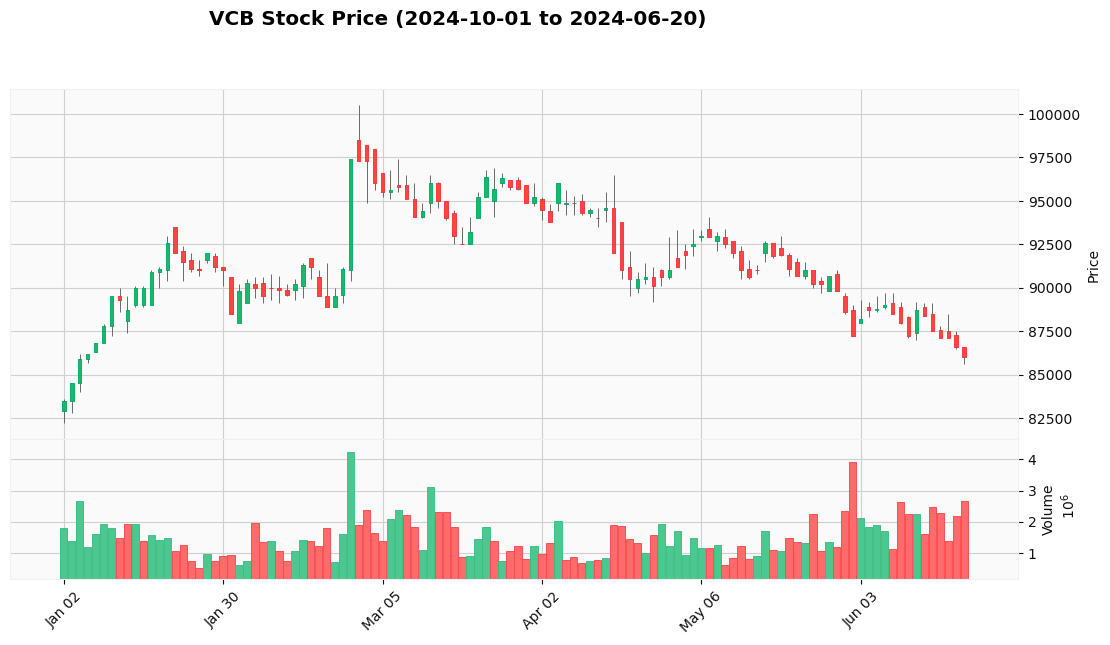

In [9]:
#Plotting the candlestick chart for historical data from 01/01/2024 - 20/06/2024
mpf.plot(filtered_df, type='candle', volume=True, style='yahoo', title='VCB Stock Price (2024-10-01 to 2024-06-20)',
         ylabel='Price', ylabel_lower='Volume', figsize=(14, 7))

#### Price Movement Analysis:
1. **January 2024**:
   - The stock started an upward trend with several consecutive green candlesticks, indicating increasing prices.
   - There was a notable bullish momentum during this period, with prices steadily climbing.

2. **Late January to Early February 2024**:
   - The stock price continued to rise, reaching a peak in early February.
   - Several large green candlesticks indicate strong buying activity.

3. **Mid to Late February 2024**:
   - A significant spike in volume accompanied a sharp rise in prices, indicating a high trading activity and possible investor interest or news impact.
   - This was followed by a brief period of consolidation where prices remained relatively stable.

4. **March 2024**:
   - There was another upward surge followed by a sharp correction.
   - The correction was accompanied by several red candlesticks, indicating selling pressure and profit-taking.

5. **April to Early May 2024**:
   - The stock entered a period of consolidation with prices fluctuating in a narrower range.
   - There were alternating green and red candlesticks, indicating indecision in the market.

6. **Mid-May to June 2024**:
   - The stock price started to decline, forming a clear downtrend.
   - Several red candlesticks indicate continued selling pressure.

7. **Late June 2024**:
   - There was an increase in trading volume, which could suggest increased market activity or another significant event affecting the stock.

#### Volume Analysis:
- **Volume Spikes**: Notable spikes in volume are observed in early March and late June. These spikes are often associated with significant price movements or news.
- **Overall Volume Trend**: Throughout the period, volume fluctuated, with occasional high trading days, indicating periods of heightened investor interest.

#### Key Observations:
- **Early Year Rally**: The stock had a strong rally in January, reaching new highs by early February.
- **Volatility in March**: March saw significant volatility with high trading volumes and sharp price movements.
- **Downtrend in Late Period**: The stock entered a downtrend in mid-May and continued declining through June.
- **Support and Resistance**: Key support levels around 85,000 and resistance around 100,000 can be inferred from the price action.

#### Overall Sentiment:
- The initial months (January to February) show bullish sentiment with rising prices and high volume.
- March displays a mixed sentiment with high volatility.
- The latter months (May to June) indicate bearish sentiment with declining prices and increasing volume.

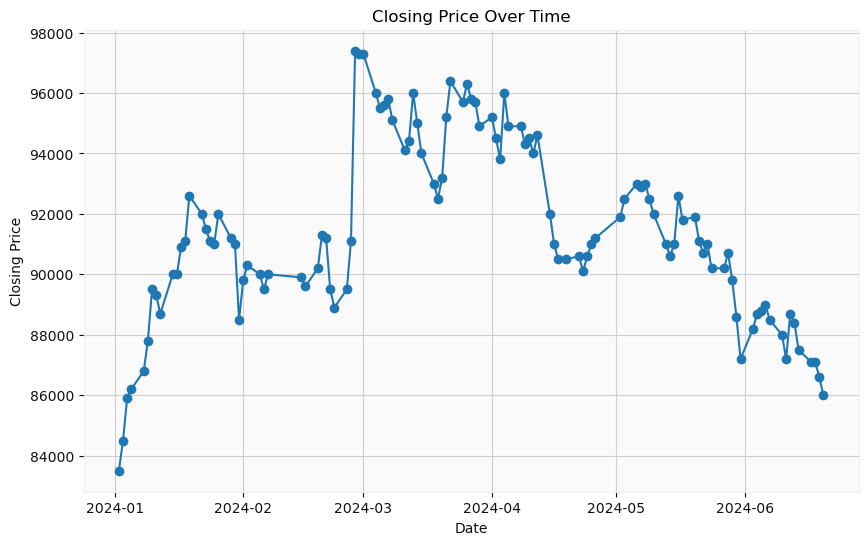

In [10]:
# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['close'], marker='o', linestyle='-')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

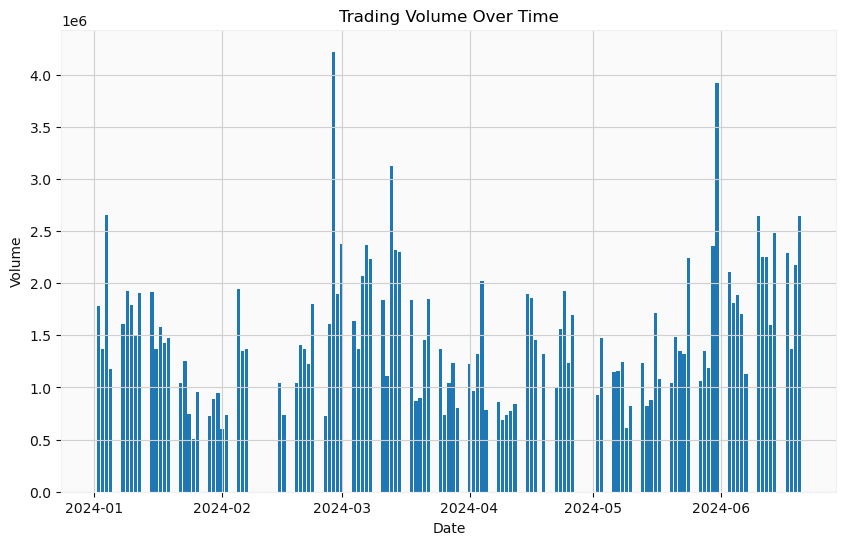

In [11]:
# Plot the trading volume over time
plt.figure(figsize=(10, 6))
plt.bar(filtered_df.index, filtered_df['volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

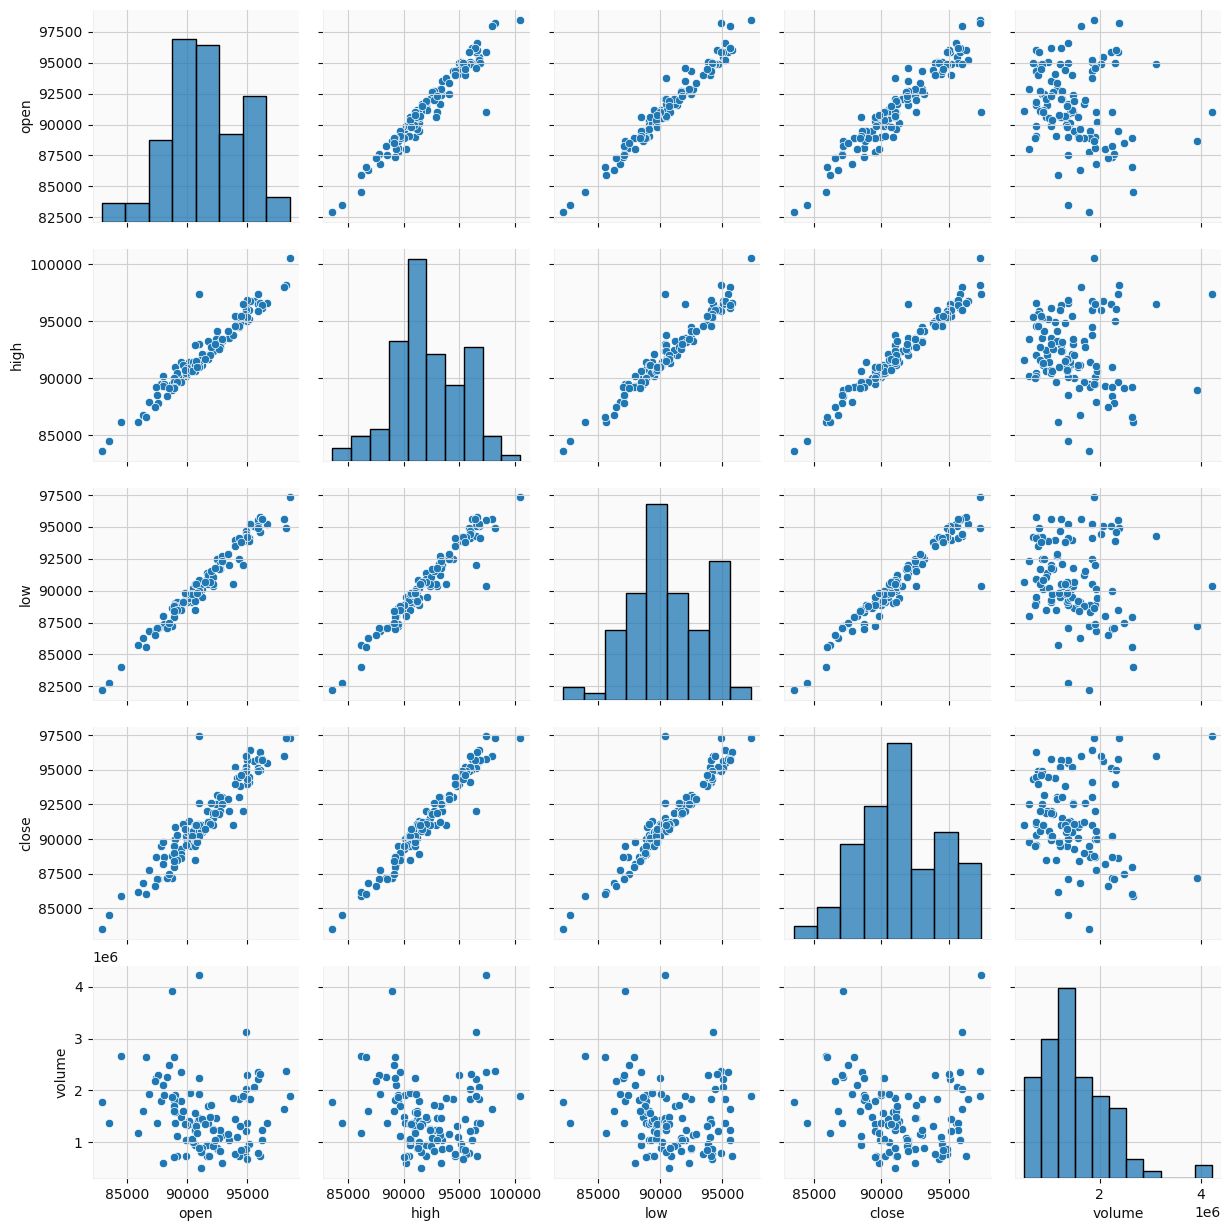

In [12]:
# Use seaborn to plot pairplot
sns.pairplot(filtered_df)
plt.show()


### 2. Econometric Method

#### OLS Regression Model

In [13]:
# Prepare the data for regression
X = df_analyse['open']
y = df_analyse['close']

X = sm.add_constant(X)
# Fit the regression model
model = sm.OLS(y, X).fit()
# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.542e+06
Date:                Sat, 22 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:52:53   Log-Likelihood:                -24640.
No. Observations:                3059   AIC:                         4.928e+04
Df Residuals:                    3057   BIC:                         4.930e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7751     25.399      1.409      0.1

##### OLS Regression Results Analysis

**Model Summary:**
- **Dependent Variable:** `close` (Closing Price of VCB stocks)
- **Independent Variable:** `open` (Opening Price of VCB stocks)

**Overall Fit:**
- **R-squared:** 0.999
  - This indicates that 99.9% of the variance in the closing prices (`close`) can be explained by the opening prices (`open`). A very high R-squared suggests that the model fits the data extremely well.

- **Adjusted R-squared:** 0.999
  - Adjusted R-squared penalizes for the number of predictors in the model, and it also indicates an excellent fit.

**Regression Coefficients:**
- **Intercept (const):** 35.7751
  - The intercept represents the estimated value of `close` when `open` is zero. However, for stock prices, interpreting intercepts is often less meaningful without a theoretical justification.

- **Slope (open):** 0.9997
  - This coefficient suggests that for every unit increase in `open` price, the `close` price increases by approximately 0.9997 units.

**Statistical Significance:**
- **P-values:** 
  - For `const` (Intercept): 0.159
  - For `open`: < 0.001
  - The p-value for `open` is very small (<< 0.05), indicating that `open` is statistically significant in predicting `close` at the 5% significance level. However, the intercept (`const`) is not statistically significant at the 5% level (p = 0.159).

**Model Evaluation:**
- **F-statistic:** 3.542e+06
  - The F-statistic tests the overall significance of the model. A high F-statistic with a very low probability (Prob (F-statistic) < 0.001) indicates that the overall model is statistically significant.

- **AIC:** 49280
- **BIC:** 49300
  - These are information criteria used for model selection. Lower values indicate better fit relative to the number of parameters.

**Assumptions and Diagnostics:**
- **Omnibus:** 524.233
  - This tests the normality of the residuals. A significant p-value (p < 0.05) indicates that the residuals are not normally distributed.
  
- **Durbin-Watson:** 2.057
  - This tests for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation (which is desirable for regression models).

- **Jarque-Bera (JB):** 5336.866
  - This tests the assumption of normality in the residuals. A significant p-value (p < 0.05) indicates that the residuals are not normally distributed.

- **Condition Number:** 8.81e+04
  - A large condition number suggests potential multicollinearity issues or numerical instability. In this case, it indicates strong multicollinearity between `const` and `open`.

##### Interpretation and Conclusion:
The OLS regression model suggests that there is a highly significant relationship between the opening and closing prices of VCB stocks. However, there are indications of non-normality in residuals and possible multicollinearity issues. Further diagnostics and possibly adjustments (such as addressing multicollinearity or transforming variables) might be necessary for improving the model's robustness. Overall, the high R-squared and significant coefficient for open indicate that the model explains the variation in close prices very well based on open prices alone.

#### Arima Statistic Model

In [14]:
# Fit the ARIMA model
model = sm.tsa.arima.ARIMA(df_analyse['close'], order=(5, 1, 0))  # (p, d, q) order of ARIMA
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3059
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -24740.388
Date:                Sat, 22 Jun 2024   AIC                          49492.776
Time:                        01:52:53   BIC                          49528.929
Sample:                             0   HQIC                         49505.768
                               - 3059                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0027      0.012      0.232      0.817      -0.020       0.026
ar.L2          0.0008      0.012      0.067      0.947      -0.022       0.024
ar.L3         -0.0552      0.012     -4.561      0.0

##### Summary of ARIMA Model Results

##### Coefficients:
- **ar.L1, ar.L2, ar.L3, ar.L4, ar.L5:** These are the coefficients for the autoregressive (AR) terms in the ARIMA model.
  - **Interpretation:** These coefficients indicate the impact of past values of the dependent variable (`close`) on its current value. For example, `ar.L1` is 0.0027, suggesting a very small positive relationship between `close` at time t-1 and `close` at time t. However, `ar.L3` (-0.0552) is statistically significant (p < 0.05) and negative, indicating a more substantial negative relationship with `close` at time t-3.

##### Statistical Significance:
- **P>|z| (p-values):** These indicate the statistical significance of each coefficient.
  - **Interpretation:** Generally, coefficients with p-values less than 0.05 are considered statistically significant. In this model, `ar.L3` is statistically significant (p = 0.000), while the others (`ar.L1`, `ar.L2`, `ar.L4`, `ar.L5`) are not (p > 0.05).

##### Variance (sigma2):
- **sigma2:** This represents the variance of the residuals (error term) in the ARIMA model.
  - **Interpretation:** A large sigma2 value (6.243e+05) suggests considerable variability in the residuals, indicating potential for further model refinement or the presence of unmodeled factors influencing the `close` prices.

##### Diagnostic Tests:
- **Ljung-Box (L1) (Q):** Tests for autocorrelation in the residuals at lag 1.
  - **Interpretation:** A small Q statistic (0.01) with a high p-value (0.93) indicates no significant autocorrelation in the residuals, suggesting the model adequately captures temporal dependencies.

- **Jarque-Bera (JB):** Tests for normality of residuals.
  - **Interpretation:** A significant JB statistic (4368.60) with a very low p-value (0.00) indicates that residuals are not normally distributed. This might suggest that the model could be improved by considering additional transformations or adjustments.

- **Heteroskedasticity (H):** Tests for constant variance of residuals.
  - **Interpretation:** A significant H statistic (15.24) with a p-value of 0.00 suggests that the residuals have non-constant variance (heteroskedasticity). This implies that the model might benefit from using a different variance specification or considering additional factors affecting variance over time.

##### Model Fit Evaluation:
- **Log Likelihood:** -24740.388
  - **Interpretation:** Higher log-likelihood values indicate better model fit. Here, the negative value indicates the log-likelihood is decreasing, but this is relative to the maximum likelihood estimation process.

- **AIC, BIC, HQIC:** These information criteria help in model selection, with lower values indicating better model fit relative to the number of parameters. In this case, AIC (49492.776), BIC (49528.929), and HQIC (49505.768) values provide options for model selection based on different criteria.

##### Conclusion:
The ARIMA(5, 1, 0) model provides insights into the temporal dependencies and variability of the `close` prices of VCB stocks. While some autoregressive terms are statistically significant, others are not, indicating potential areas for model refinement. The diagnostics suggest that while the model captures temporal dependencies adequately, there may be issues with residual normality and heteroskedasticity that could be addressed for further improvement.

# Preprocessing Data

In [15]:
df_data = df [['time','open','close']]
df_data.set_index('time',drop=True,inplace=True)
df_data.reset_index(inplace=True)
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    3059 non-null   object
 1   open    3059 non-null   int64 
 2   close   3059 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 71.8+ KB


,time,open,close
0,2012-03-20,10100,10560
1,2012-03-21,10560,10600
2,2012-03-22,10600,10670
3,2012-03-23,10670,10530
4,2012-03-26,10530,10490


In [16]:
# Normalization Data
scaler = MinMaxScaler()
numerical_columns = ['open', 'close']
df_data[numerical_columns] = scaler.fit_transform(df_data[numerical_columns])

In [17]:
# Split Train - Test data
training_size = round(len(df_data) * 0.80)
train_data = df_data[:training_size]
test_data  = df_data[training_size:]

train_data.set_index('time',inplace=True)
test_data.set_index('time',inplace=True)

display(train_data.head())
display(test_data.head())
display(test_data.shape, train_data.shape)

,open,close
time,,
2012-03-20,0.028892,0.034360
2012-03-21,0.033945,0.034805
2012-03-22,0.034384,0.035583
2012-03-23,0.035153,0.034026
2012-03-26,0.033615,0.033582


,open,close
time,,
2022-01-05,0.652752,0.651396
2022-01-06,0.649017,0.661737
2022-01-07,0.658354,0.668298
2022-01-10,0.659343,0.660736
2022-01-11,0.662089,0.664517


(612, 2)

(2447, 2)

- Resetting the index and preparing a subset (`pre_data`) with relevant features (`'open'` and `'close'` prices).
- Normalizing the numerical columns (`'open'` and `'close'`) using `StandardScaler` to ensure they have a consistent scale for modeling.
- Splitting the normalized data into training (`train_data`) and testing (`test_data`) sets to facilitate model training and evaluation.

These steps ensure that your data is appropriately formatted and scaled for further machine learning model development and analysis.

### Normalization (or Standardization)

**Reasons for Normalization:**

1. **Equalize Scale:** Different features in your dataset may have different scales (e.g., stock prices vs. volumes). Models like neural networks and SVMs can perform better when features are on a similar scale. Normalization transforms data to a standard scale, typically with mean 0 and standard deviation 1.

2. **Speed Convergence:** Algorithms such as gradient descent used in training neural networks converge faster on normalized data. Without normalization, certain features might dominate due to their larger scale, slowing down convergence.

3. **Regularization:** Some regularization techniques (e.g., Lasso, Ridge regression) assume standardized data, ensuring fair penalization across all features.

### Splitting into Training and Test Sets

**Reasons for Splitting Data:**

1. **Model Evaluation:** By dividing data into training (used to train the model) and test (used to evaluate the model’s performance), you can assess how well the model generalizes to unseen data. This helps in estimating the model’s performance on future, unseen data.

2. **Avoid Overfitting:** Training a model on the entire dataset can lead to overfitting, where the model memorizes the training data rather than learning patterns that generalize well. Splitting the data allows you to check if the model is overfitting by evaluating its performance on unseen test data.

3. **Hyperparameter Tuning:** When optimizing model performance, splitting data into training, validation, and test sets helps in tuning hyperparameters without leaking information from test data into the training process.

### Conclusion

In summary, normalization ensures that features are on a consistent scale, which aids in model training and convergence. Splitting data into training and test sets allows for unbiased model evaluation and helps prevent overfitting. Together, these steps form a foundational part of preparing data for machine learning tasks, ensuring that models are trained effectively and evaluated accurately on unseen data.

In [18]:
def create_sequence(dataset):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

display(train_seq.shape, test_seq.shape)

(2397, 50, 2)

(562, 50, 2)

### Explanation of `create_sequence` Function:

#### Function Purpose:
The function `create_sequence` takes a dataset (assumed to be a pandas DataFrame) as input and creates sequences of data points for training a model. It uses a sliding window approach to extract sequences and their corresponding labels from the dataset.

#### Steps and Reasons:

1. **Define Sequences and Labels Lists:**
   - `sequences = []`: This list will store the sequences of data points extracted from the dataset.
   - `labels = []`: This list will store the corresponding labels (next data point after each sequence) for each sequence.

2. **Iterative Extraction of Sequences:**
   - **Loop Explanation:** The function iterates over the dataset starting from index 0 (`start_idx`) up to the length of the dataset minus 50 (`stop_idx`).
   - **Sequence Extraction:** For each iteration, it extracts a sequence of data points from `start_idx` to `stop_idx`. The length of each sequence is 50 data points (assuming the sequence length is fixed at 50 in this example).
   - **Label Extraction:** It also extracts the label, which is the data point immediately following the sequence (`dataset.iloc[stop_idx]`).

3. **Incremental Index Update:**
   - `start_idx += 1`: After extracting a sequence and its label, the `start_idx` is incremented by 1. This ensures that the next sequence starts immediately after the previous one, creating a sliding window effect.

4. **Return Sequences and Labels:**
   - Finally, the function returns two numpy arrays: `sequences` containing all extracted sequences and `labels` containing all corresponding labels.

### Effects on Deep Learning or Machine Learning Models:

#### Importance of Sequences in Models:

- **Sequence Prediction:** Many machine learning tasks, such as time series forecasting or natural language processing (NLP), require models to understand patterns across sequences of data.
  
- **Model Input Format:** Deep learning models like recurrent neural networks (RNNs), long short-term memory networks (LSTMs), or convolutional neural networks (CNNs) often expect input data in sequences. The `create_sequence` function prepares data in a format suitable for these models.

- **Feature Representation:** Sequences allow models to capture temporal dependencies and patterns in data. For instance, in stock price prediction, a sequence of historical prices can help the model learn trends and patterns that might influence future prices.

- **Sliding Window Approach:** Using a sliding window approach (where sequences overlap), the model can learn from multiple perspectives within the data, enhancing its ability to generalize and make accurate predictions on unseen data.

### Conclusion:

In summary, the `create_sequence` function plays a critical role in preparing sequential data for deep learning or machine learning models. It facilitates the training process by structuring data into manageable sequences with corresponding labels, enabling models to learn from past observations and make informed predictions or classifications. This structured approach enhances the model's ability to handle temporal data and capture underlying patterns effectively.

# Modeling

## Define BiLSTM model

In [23]:
def build_BiLSTM_model():
    input = tf.keras.layers.Input(
        shape=(train_seq.shape[1], train_seq.shape[2]), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(512, return_sequences=True))(input)

    x = tf.keras.layers.Bidirectional(LSTM(316, return_sequences=False, dropout=0.5))(x)

    x = tf.keras.layers.Dense(128 , activation="relu", name ="dense_1")(x)

    output = tf.keras.layers.Dense(2, name="last_dense")(x)

    model = tf.keras.Model(inputs=input, outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

    return model

LSTM_model = build_BiLSTM_model()
LSTM_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 50, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 50, 1024)       │     2,109,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 632)            │     3,390,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        81,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_dense (Dense)              │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,580,770 (21.29 MB)

 Trainable params: 5,580,770 (21.29 MB)

 Non-trainable params: 0 (0.00 B)

### Theoretical Model Used: Bidirectional LSTM (BiLSTM)

#### LSTM (Long Short-Term Memory)

**Overview:**
- LSTM is a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data.
- It addresses the vanishing gradient problem of traditional RNNs by using a gating mechanism that allows the network to remember or forget information over time.

**Key Components:**
- **Cell State:** Represents the memory of the network. Information can be added or removed via gates (input, forget, output gates).
- **Gates:** Control the flow of information inside the LSTM unit, determining what information to keep or discard.

#### Bidirectional LSTM (BiLSTM)

**Purpose:**
- BiLSTM extends LSTM by processing the input sequence in both forward and backward directions. This enables the model to capture information from past and future contexts simultaneously.

**Architecture:**
- **Forward LSTM:** Processes the sequence from start to end.
- **Backward LSTM:** Processes the sequence from end to start.
- **Concatenation:** Outputs from both LSTMs are concatenated, providing a richer representation of the input sequence that captures dependencies from both directions.

#### Model Architecture:

**Explanation of the Model:**
- **Input Layer:** Accepts sequences of shape `(sequence_length, number_of_features)` where `sequence_length` is the length of each sequence and `number_of_features` is the number of features in each time step.
- **Bidirectional LSTM Layers:** Two layers of BiLSTM are stacked:
  - The first BiLSTM layer (`Bidirectional(LSTM(512, return_sequences=True))`) returns sequences to the next layer, allowing it to learn from sequences.
  - The second BiLSTM layer (`Bidirectional(LSTM(316, return_sequences=False, dropout=0.5))`) returns only the final output of the sequence and applies dropout to reduce overfitting.
- **Dense Layers:** Fully connected layers (`Dense`) with ReLU activation to capture non-linear relationships in the data.
- **Output Layer:** Outputs a vector of size 2, suitable for regression tasks where two output values are predicted.

### Training Strategy:

**Data Preparation:**
- **Sequence Creation:** Utilizes `create_sequence` function to generate sequences and labels from the dataset, ensuring the model sees sequential patterns.
- **Normalization:** Scales data to a common range using `StandardScaler` to stabilize and improve training.

**Model Compilation:**
- **Loss Function:** Uses mean squared error (`'mean_squared_error'`) as the loss function, appropriate for regression tasks where predictions should be close to actual values.
- **Optimizer:** Utilizes Adam optimizer (`'adam'`), which adapts learning rates during training to converge efficiently.

**Training Process:**
- **Epochs and Batch Size:** Trains over multiple epochs (iterations over the entire dataset) with a specified batch size (`batch_size=32` in `model.fit`), balancing computational efficiency and gradient accuracy.
- **Validation Split:** Splits training data into training and validation sets (`validation_data=(X_test, y_test)`), assessing model performance on unseen data.

### Forecasting Strategy:

**Prediction:**
- **Model Predictions:** After training, makes predictions (`model.predict(X_test)`) on test sequences to evaluate model performance.
- **Inverse Transform:** Inverts normalization (`scaler.inverse_transform(predictions)`) to obtain predictions in the original scale for evaluation.

### Conclusion:

The BiLSTM model architecture leverages bidirectional processing and LSTM units to capture complex temporal patterns in sequential data like stock prices. The training strategy focuses on optimizing model parameters using gradient descent with Adam optimizer, while the forecasting strategy involves making predictions on unseen data for evaluation. These components collectively enable the model to learn from historical data and generalize to make accurate predictions, showcasing the power of deep learning in handling sequential data analysis tasks effectively.

## Trainning Model

In [24]:
batch_size = 20
early_stopping_patience = 17
LSTM_model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80


75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 361ms/step - loss: 0.0249 - mean_absolute_error: 0.0856 - val_loss: 0.0036 - val_mean_absolute_error: 0.0502
Epoch 2/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 356ms/step - loss: 6.3593e-04 - mean_absolute_error: 0.0171 - val_loss: 8.9712e-04 - val_mean_absolute_error: 0.0238
Epoch 3/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 350ms/step - loss: 5.6490e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0033 - val_mean_absolute_error: 0.0498
Epoch 4/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 361ms/step - loss: 4.0497e-04 - mean_absolute_error: 0.0133 - val_loss: 5.9826e-04 - val_mean_absolute_error: 0.0189
Epoch 5/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 365ms/step - loss: 3.9296e-04 - mean_absolute_error: 0.0130 - val_loss: 6.0407e-04 - val_mean_absolute_error: 0.0192
Epoch 6/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 360ms/step - loss: 3.6851e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0014 - val_mean_absolute_error: 0.0315
Epoch 7/80
75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 358ms/step - loss: 2.8149e-04 -

#### Components Explained:

1. **batch_size = 20**:
   - This parameter specifies the number of samples that will be propagated through the neural network at once. It's a hyperparameter that can impact memory usage and training speed. Smaller batch sizes generally provide a more noisy estimate of the gradient, but they often lead to better generalization.

2. **early_stopping_patience = 17**:
   - Early stopping is a technique used to halt the training process if the performance on a validation dataset stops improving or starts to degrade, thus preventing overfitting. `early_stopping_patience` specifies the number of epochs with no improvement after which training will be stopped. In this case, if the validation loss does not improve for 17 consecutive epochs, training will stop early.

3. **LSTM_model.fit(train_seq, train_label, epochs=80, validation_data=(test_seq, test_label), verbose=1)**:
   - This line of code is where the actual training of the LSTM model (`LSTM_model`) takes place.
   - `train_seq` and `train_label` are the training sequences and corresponding labels (targets) used to train the model.
   - `epochs=80` specifies the number of times the entire training dataset is passed forward and backward through the neural network.
   - `validation_data=(test_seq, test_label)` provides a separate set of data (`test_seq` and `test_label`) to evaluate the performance of the model during training. This helps monitor overfitting and generalization.
   - `verbose=1` controls the verbosity of the training output. Setting it to 1 means you will see a progress bar as the model trains, which includes information about the loss and metrics on both the training and validation sets.

#### Training Process Overview:

During the training process, the LSTM model iteratively learns from the `train_seq` data to predict `train_label`. At the end of each epoch, the model's performance on the `test_seq` data is evaluated using the `test_label`. This evaluation helps determine how well the model generalizes to unseen data.

- **Epochs**: Each epoch represents one complete pass through the entire training dataset.
- **Batch Size**: Defines how many samples are used together to compute the gradient and update the model's weights.
- **Early Stopping**: Prevents the model from overfitting by monitoring the validation loss and stopping training if it stops improving.

## Evaluate Model

In [25]:
test_predicted = LSTM_model.predict(test_seq)
test_inverse_predicted = scaler.inverse_transform(test_predicted)

test_inverse_predicted[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


array([[70882.03 , 70381.82 ],
       [70869.29 , 70373.64 ],
       [69857.805, 69393.14 ],
       [69086.53 , 68651.63 ],
       [68991.945, 68567.17 ]], dtype=float32)

In [26]:
df_slice_data = pd.concat([df_data .iloc[-562:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df_data .iloc[-562:].index)], axis=1)
df_slice_data[['open','close']] = scaler.inverse_transform(df_slice_data[['open','close']])
display(df_slice_data.head())
df_slice_data.info()

,time,open,close,open_predicted,close_predicted
2497,2022-03-23,71890.0,71890.0,70882.031250,70381.820312
2498,2022-03-24,71890.0,70700.0,70869.289062,70373.640625
2499,2022-03-25,71130.0,69860.0,69857.804688,69393.140625
2500,2022-03-28,70280.0,69770.0,69086.531250,68651.632812
2501,2022-03-29,69770.0,69350.0,68991.945312,68567.171875


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 2497 to 3058
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             562 non-null    object 
 1   open             562 non-null    float64
 2   close            562 non-null    float64
 3   open_predicted   562 non-null    float32
 4   close_predicted  562 non-null    float32
dtypes: float32(2), float64(2), object(1)
memory usage: 17.7+ KB


In [27]:
df_slice_data['time'] = pd.to_datetime(df_slice_data['time'])

#Set time column as index
df_slice_data.set_index('time', inplace=True)
df_slice_data

,open,close,open_predicted,close_predicted
time,,,,
2022-03-23,71890.0,71890.0,70882.031250,70381.820312
2022-03-24,71890.0,70700.0,70869.289062,70373.640625
2022-03-25,71130.0,69860.0,69857.804688,69393.140625
2022-03-28,70280.0,69770.0,69086.531250,68651.632812
2022-03-29,69770.0,69350.0,68991.945312,68567.171875
...,...,...,...,...
2024-06-14,88500.0,87500.0,86693.710938,85991.648438
2024-06-17,87600.0,87100.0,85847.750000,85162.984375
2024-06-18,87500.0,87100.0,85435.914062,84765.367188


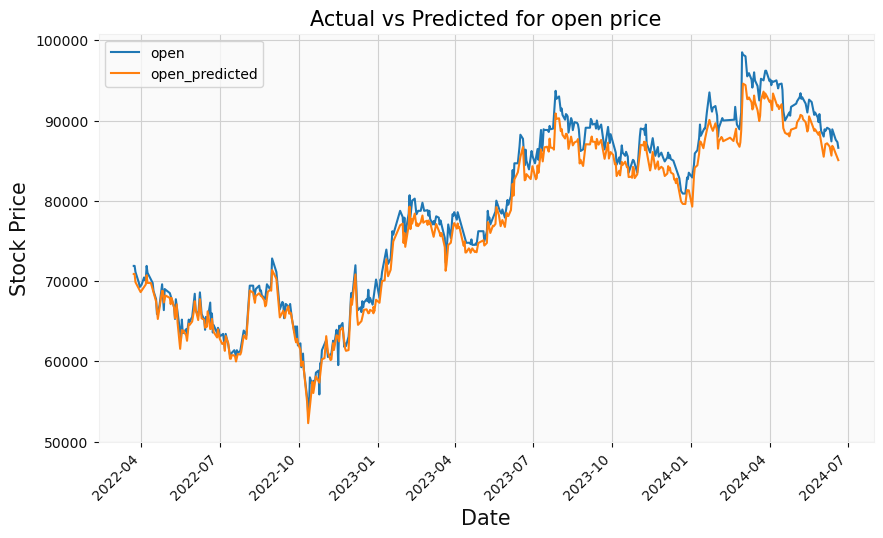

In [28]:
df_slice_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

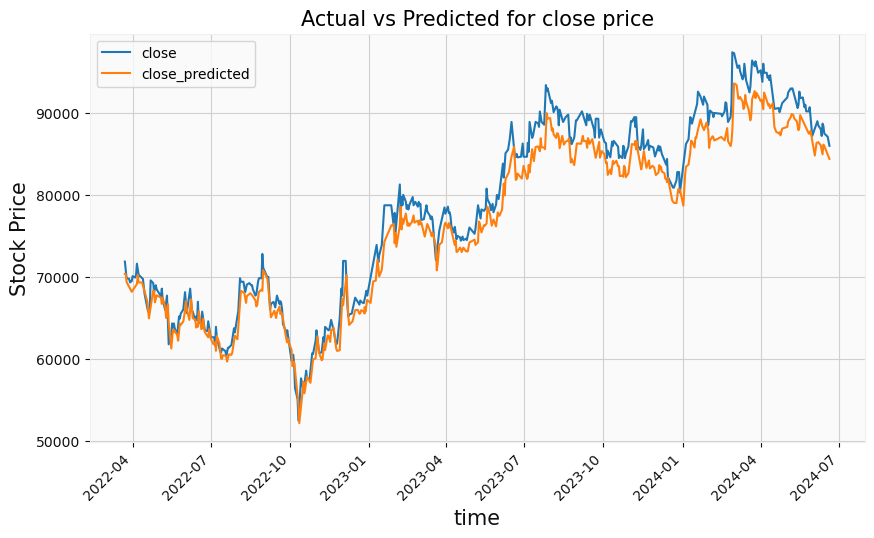

In [29]:
df_slice_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('time',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()